# Arbre de décision

Un arbre de décision est un modèle de classification et de régression supervisé basée sur la division récursive de l'espace des attributs en règles de décision simples.

Un arbre de décision est en somme un modèle prédictif qui utilise une structure en forme d'arbre pour prendre des décisions à partir de données d'entrée.

## Formulation mathématique d'un arbre de décision

Soit $\mathcal{C}$ l'ensemble des classes possibles.

Supposons disposé d'un jeu d'entraînement,
$$ \mathcal{D} = \{(x_i,y_i)\}_{i=1}^n \quad\text{avec}\quad x_i\in\mathbb{R}^d \quad\text{et}\quad y_i\in\mathcal{C}$$

# Structure de base d’un arbre de décision

Un arbre de décision est composé de nœuds et de branches :

1. Racine (Root Node)

C’est le premier nœud de l’arbre. Il représente l’attribut (ou caractéristique) sur lequel la première division est faite. C’est le point de départ de toutes les décisions.

3. Nœuds internes (Internal Nodes)

Chaque nœud représente une condition de décision basée sur une caractéristique de l’entrée.

Exemple : longueur_pétale <= 2.5

5. Branches

Elles représentent les issues possibles d’un test/condition.

Exemple : si la condition est vraie → aller à gauche ; sinon → aller à droite.

4. Feuilles (Leaf Nodes / Terminal Nodes)

Ce sont les nœuds finaux de l’arbre.
Ils contiennent la classe prédite (dans un problème de classification) ou la valeur prédite (en régression).

Exemple : Classe = Iris-setosa

## Fonctionnement général

1. À chaque nœud, l’algorithme choisit la meilleure variable et le meilleur seuil pour diviser les données.

2. La division continue récursivement jusqu’à ce qu’un critère d’arrêt soit atteint :

    - Profondeur maximale atteinte
    - Aucun gain d’information supplémentaire
    - Nombre minimal d’échantillons dans un nœud

3. La décision finale est donnée par les valeurs dans les feuilles.

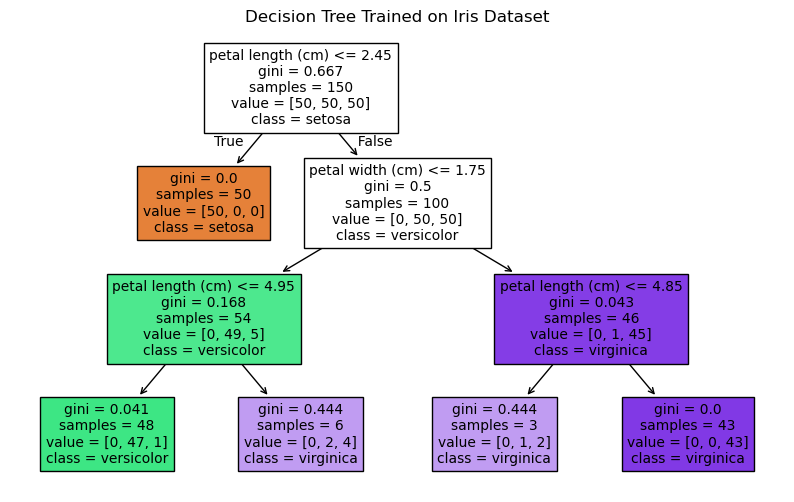

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # labels

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()


# Principe de construction

À chaque nœud, nous cherchons la meilleure division des données selon la régle du test d'hypothèses suivant :
$$ x_i \leq t \quad \text{vs.} \quad x_i<t $$
Cette division vise à maximiser la "pureté" des sous-groupes obtenus. Cela se fait à travers une fonction de critère, comme l'entropie, l'indice de Gini, ou encore l'erreur de classification.

## Entropie

L'entropie d'un nœud contenant les classes $\{p_1,\ldots,p_k\}$ est donnée par:
$$ H(S) = - \sum_{i=1}^n p_i\log{}p_i $$
où $p_i$ est la proportion d'exemples de la classe $i$

## Indice de Gini

L'indice de Gini s'écrit,
$$ G(S) = 1 - \sum_{i=1}^k p_i^2 $$

## Erreur de classication 

L'erreur de classification s'écrit ainsi,
$$\mathrm{Erreur}(S) = 1 - \max_i p_i$$


# Algorithme de construction

Il s'agit d'un algorithme récursif.

Pour chaque noœud,

1. Si le noeud est pur ou la profonder maximale est atteinte, alors c'est une feuille.
2. Sinon, pour chaque $x_i$ et seuil $t$, le score (Gini, entropie, etc.) est calculé.
3. Le meilleur couple $(x_i,t)$ est choisi comme division.
4. Nous appliquons ce procédé récursivement aux sous-ensembles.

# Prédicition

Soit $x\in\mathbb{R}^d$.

Nous appliquons depuis le haut de l'arbre chaque tests qui lui attribura en fin de procédé une feuille.

La prédiction $\hat{y}$ est la classe dominante de cette feuille.
